#Importing Libraries

In [186]:
import pandas as pd       #data processing
import numpy as np        #linear algebra
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')

#Reading the CSV file from Bucket

In [187]:
import pandas as pd
from google.cloud import storage
from io import BytesIO
client = storage.Client()
bucket_name = "elulatest"
file_name = "trip_data_1.csv"
bucket = client.get_bucket(bucket_name)
blob = bucket.get_blob(file_name)
content = blob.download_as_string()
data = pd.read_csv(BytesIO(content))

#Reading the CSV file from Bucket

In [190]:
file_name = "trip_fare_1.csv"
bucket = client.get_bucket(bucket_name)
blob = bucket.get_blob(file_name)
content = blob.download_as_string()
fare = pd.read_csv(BytesIO(content))

In [191]:
data.dtypes

medallion              object
hack_license           object
vendor_id              object
rate_code               int64
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_time_in_secs       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
dtype: object

In [192]:
fare.dtypes

medallion            object
 hack_license        object
 vendor_id           object
 pickup_datetime     object
 payment_type        object
 fare_amount        float64
 surcharge          float64
 mta_tax            float64
 tip_amount         float64
 tolls_amount       float64
 total_amount       float64
dtype: object

In [193]:
data.isnull().sum()

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    7326207
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude          86
dropoff_latitude           86
dtype: int64

In [194]:
fare.isnull().sum()

medallion           0
 hack_license       0
 vendor_id          0
 pickup_datetime    0
 payment_type       0
 fare_amount        0
 surcharge          0
 mta_tax            0
 tip_amount         0
 tolls_amount       0
 total_amount       0
dtype: int64

In [195]:
data.nunique()

medallion               13426
hack_license            32224
vendor_id                   2
rate_code                  14
store_and_fwd_flag          2
pickup_datetime       2303465
dropoff_datetime      2305816
passenger_count            10
trip_time_in_secs        6594
trip_distance            4368
pickup_longitude        40442
pickup_latitude         64511
dropoff_longitude       56249
dropoff_latitude        88766
dtype: int64

In [196]:
fare.nunique()

medallion             13426
 hack_license         32224
 vendor_id                2
 pickup_datetime    2303465
 payment_type             5
 fare_amount           1417
 surcharge               23
 mta_tax                  2
 tip_amount            2768
 tolls_amount           502
 total_amount          8695
dtype: int64

In [197]:
data.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.477662e+07,1.477662e+07,1.477662e+07,1.477662e+07,1.477662e+07,1.477662e+07,1.477653e+07,1.477653e+07
mean,1.034273e+00,1.697372e+00,6.834236e+02,2.770976e+00,-7.263634e+01,4.001440e+01,-7.259443e+01,3.999219e+01
std,3.387715e-01,1.365396e+00,4.944063e+02,3.305923e+00,1.013819e+01,7.789904e+00,1.028860e+01,7.537067e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.771285e+03,-3.547921e+03,-2.350956e+03,-3.547921e+03
25%,1.000000e+00,1.000000e+00,3.600000e+02,1.000000e+00,-7.399188e+01,4.073551e+01,-7.399121e+01,4.073468e+01
50%,1.000000e+00,1.000000e+00,5.540000e+02,1.700000e+00,-7.398166e+01,4.075315e+01,-7.398013e+01,4.075362e+01
75%,1.000000e+00,2.000000e+00,8.850000e+02,3.060000e+00,-7.396684e+01,4.076729e+01,-7.396390e+01,4.076819e+01
max,2.100000e+02,2.550000e+02,1.080000e+04,1.000000e+02,1.124042e+02,3.310365e+03,2.228738e+03,3.477106e+03


In [198]:
fare.describe()

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.477662e+07,1.477662e+07,1.477662e+07,1.477662e+07,1.477662e+07,1.477662e+07
mean,1.166472e+01,3.204904e-01,4.983970e-01,1.267509e+00,2.018670e-01,1.395298e+01
std,9.639219e+00,3.675741e-01,2.826541e-02,2.046084e+00,1.035481e+00,1.146469e+01
min,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,7.700000e+00
50%,9.000000e+00,0.000000e+00,5.000000e-01,8.000000e-01,0.000000e+00,1.050000e+01
75%,1.300000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.550000e+01
max,5.000000e+02,1.250000e+01,5.000000e-01,2.000000e+02,2.000000e+01,6.500000e+02


In [199]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [200]:
fare.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,2013-01-01 15:11:48,CSH,6.5,0.0,0.5,0.0,0.0,7.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-06 00:18:35,CSH,6.0,0.5,0.5,0.0,0.0,7.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-05 18:49:41,CSH,5.5,1.0,0.5,0.0,0.0,7.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:54:15,CSH,5.0,0.5,0.5,0.0,0.0,6.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:25:03,CSH,9.5,0.5,0.5,0.0,0.0,10.5


#combining & selecting information from the two csv files

In [203]:
data["payment_type"] = fare[" payment_type"]
data["fare_amount"] = fare[" fare_amount"]
data["surcharge"] = fare[" surcharge"]
data["mta_tax"] = fare[" mta_tax"]
data["tip_amount"] = fare[" tip_amount"]
data["tolls_amount"] = fare[" tolls_amount"]
data["total_amount"] = fare[" total_amount"]
data = data.drop(columns = ['store_and_fwd_flag'])

#Removing the outliers and null 

In [204]:
df = data[(data['passenger_count'] != 0) & (data['passenger_count'] <= 6)]
df = data[data['fare_amount'] < 60]
df = data[data['surcharge'] < 1.5]
df = data[data['tip_amount'] < 10]
df = data[data['tolls_amount'] < 5]
df = data[data['total_amount'] < 55]
df['dropoff_longitude'] = df['dropoff_longitude'].fillna(df['dropoff_longitude'].mode()[0])
df['dropoff_latitude'] = df['dropoff_latitude'].fillna(df['dropoff_latitude'].mode()[0])

In [205]:
data.shape

(14776615, 20)

In [206]:
df.shape

(14469401, 20)

In [207]:
df.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171,CSH,6.5,0.0,0.5,0.0,0.0,7.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660,CSH,6.0,0.5,0.5,0.0,0.0,7.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002,CSH,5.5,1.0,0.5,0.0,0.0,7.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388,CSH,5.0,0.5,0.5,0.0,0.0,6.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868,CSH,9.5,0.5,0.5,0.0,0.0,10.5


In [208]:
df.isnull().sum()

medallion            0
hack_license         0
vendor_id            0
rate_code            0
pickup_datetime      0
dropoff_datetime     0
passenger_count      0
trip_time_in_secs    0
trip_distance        0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
payment_type         0
fare_amount          0
surcharge            0
mta_tax              0
tip_amount           0
tolls_amount         0
total_amount         0
dtype: int64

In [210]:
df.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.446940e+07,1.446940e+07,1.446940e+07,1.446940e+07,1.446940e+07,1.446940e+07,1.446940e+07,1.446940e+07,1.446940e+07,1.446940e+07,1.446940e+07,1.446940e+07,1.446940e+07,1.446940e+07
mean,1.010573e+00,1.696787e+00,6.540737e+02,2.495319e+00,-7.267246e+01,4.003393e+01,-7.263572e+01,4.001493e+01,1.074079e+01,3.258115e-01,4.995726e-01,1.139172e+00,1.210003e-01,1.282635e+01
std,2.571608e-01,1.365608e+00,4.338072e+02,2.551255e+00,1.000504e+01,7.715306e+00,1.013732e+01,7.424328e+00,6.983275e+00,3.682406e-01,1.461256e-02,1.583760e+00,7.588919e-01,8.173115e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.771285e+03,-3.547921e+03,-2.350956e+03,-3.547921e+03,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,1.000000e+00,1.000000e+00,3.600000e+02,1.000000e+00,-7.399198e+01,4.073646e+01,-7.399121e+01,4.073537e+01,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,7.500000e+00
50%,1.000000e+00,1.000000e+00,5.400000e+02,1.700000e+00,-7.398186e+01,4.075350e+01,-7.398023e+01,4.075390e+01,8.500000e+00,0.000000e+00,5.000000e-01,7.000000e-01,0.000000e+00,1.050000e+01
75%,1.000000e+00,2.000000e+00,8.400000e+02,2.940000e+00,-7.396757e+01,4.076752e+01,-7.396438e+01,4.076831e+01,1.250000e+01,5.000000e-01,5.000000e-01,1.900000e+00,0.000000e+00,1.500000e+01
max,2.100000e+02,2.550000e+02,1.080000e+04,1.000000e+02,1.124042e+02,3.310365e+03,2.228738e+03,3.477106e+03,5.480000e+01,1.250000e+01,5.000000e-01,5.100000e+01,2.000000e+01,5.499000e+01


#Ploting the trips

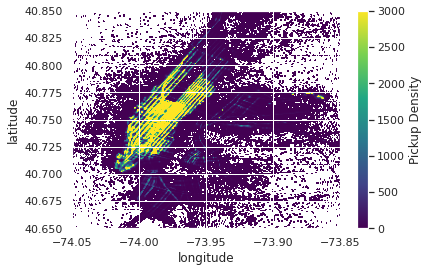

In [12]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=50000)
def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis, vmin=0, vmax=3000)
    fig.colorbar(density, label='Pickup Density')
    ax.set_ylabel('latitude')
    ax.set_xlabel('longitude')
fig = plt.figure()
using_mpl_scatter_density(fig, df['pickup_longitude'].values, df['pickup_latitude'].values)
plt.axis([-74.05, -73.85, 40.65, 40.85])
plt.show()

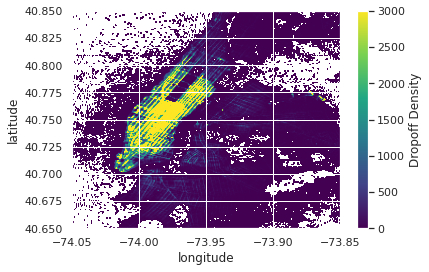

In [13]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=50000)
def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis, vmin=0, vmax=3000)
    fig.colorbar(density, label='Dropoff Density')
    ax.set_ylabel('latitude')
    ax.set_xlabel('longitude')
fig = plt.figure()
using_mpl_scatter_density(fig, df['dropoff_longitude'].values, df['dropoff_latitude'].values)
plt.axis([-74.05, -73.85, 40.65, 40.85])
plt.show()

#converting to datetime 

In [214]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()
df['pickup_day_no'] = df['pickup_datetime'].dt.weekday
df['dropoff_day_no'] = df['dropoff_datetime'].dt.weekday
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'
    
df['pickup_timeofday'] = df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday'] = df['dropoff_hour'].apply(time_of_day)

#Ploting the distribution of trip data 

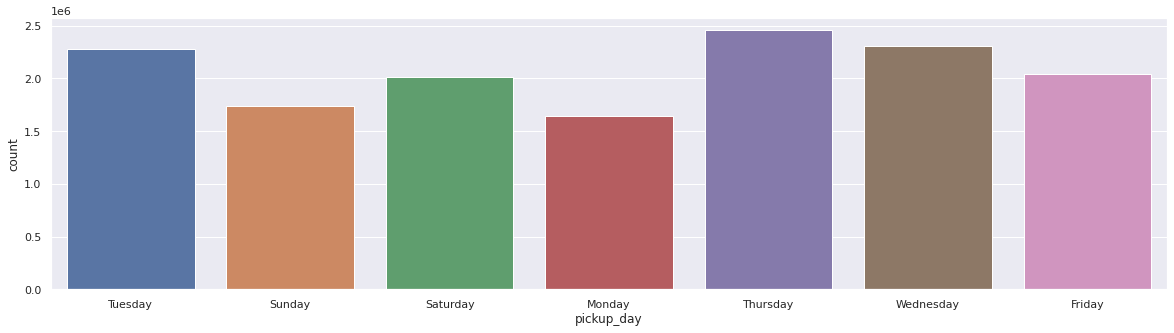

In [8]:
plt.figure(figsize=(20,5)) 
sns.countplot(x ="pickup_day", data = df)
plt.show()

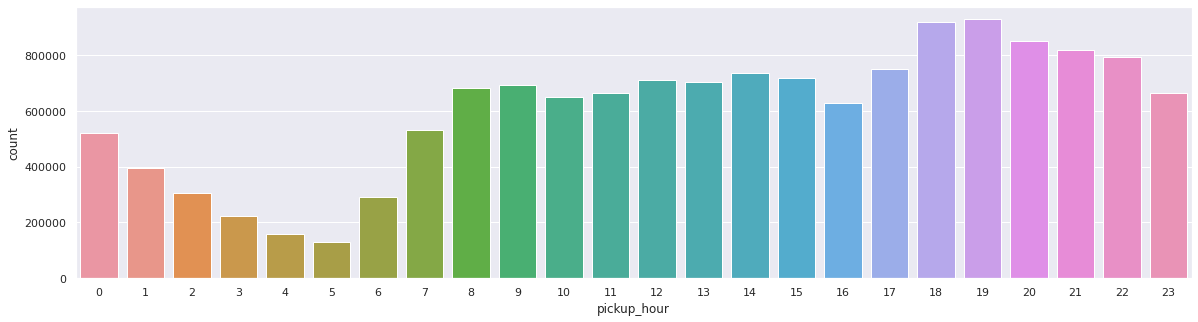

In [10]:
plt.figure(figsize=(20,5)) 
sns.countplot(x="pickup_hour",data=df)
plt.show()

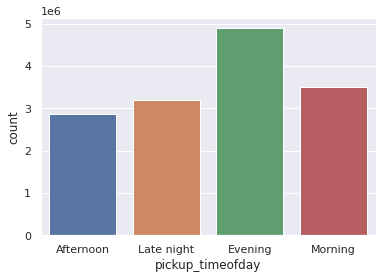

In [12]:
sns.countplot(x="pickup_timeofday",data=df)
plt.show()

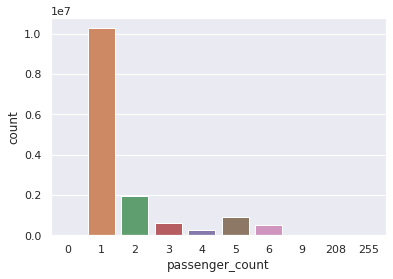

In [14]:
sns.countplot(x='passenger_count',data=df)
plt.show()

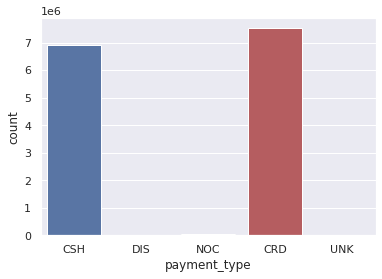

In [15]:
sns.countplot(x='payment_type',data=df)
plt.show()

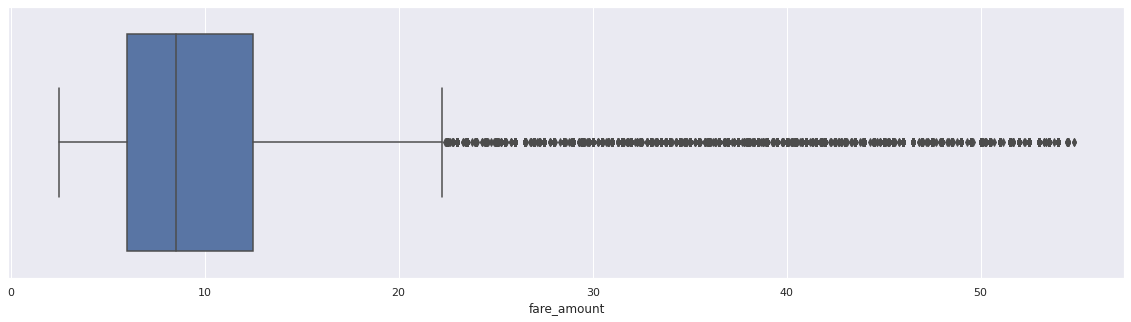

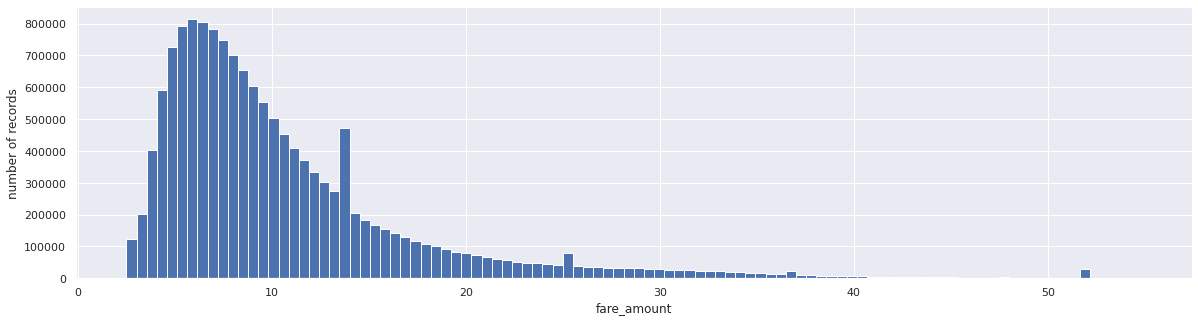

<Figure size 1440x360 with 0 Axes>

In [36]:
plt.figure(figsize=(20,5)) 
sns.boxplot(df["fare_amount"])
plt.figure(figsize=(20,5)) 
plt.hist(df['fare_amount'], bins=100)
plt.xlabel('fare_amount')
plt.ylabel('number of records')
plt.figure(figsize=(20,5)) 
plt.show()

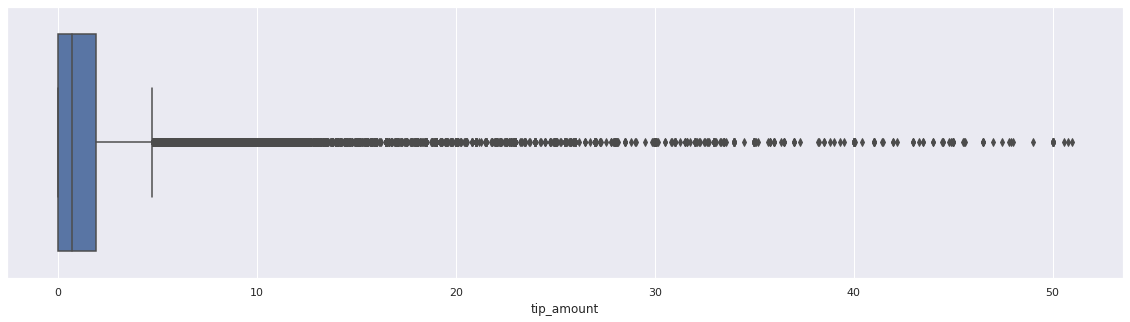

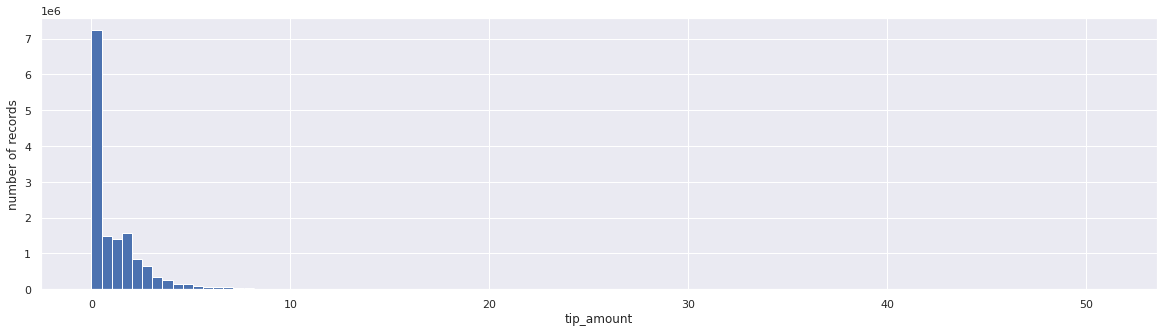

<Figure size 1440x360 with 0 Axes>

In [37]:
plt.figure(figsize=(20,5)) 
sns.boxplot(df["tip_amount"])
plt.figure(figsize=(20,5)) 
plt.hist(df['tip_amount'], bins=100)
plt.xlabel('tip_amount')
plt.ylabel('number of records')
plt.figure(figsize=(20,5)) 
plt.show()

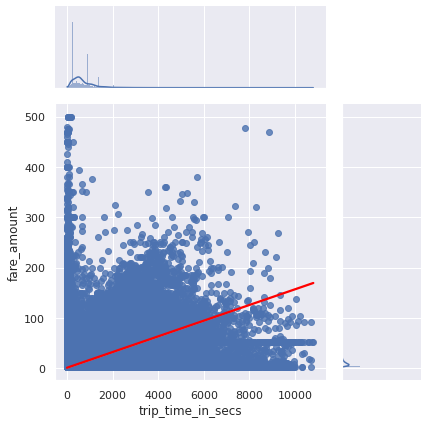

In [10]:
sns.jointplot(x="trip_time_in_secs", y="fare_amount", kind="reg", data=df, joint_kws={'line_kws':{'color':'red'}}, height=6, ratio=3)
plt.show()      

#Group by the data by hack_license

In [213]:
driver=df.groupby(['hack_license']).agg({'trip_time_in_secs':'sum','trip_distance':'sum', 'total_amount':'sum'})


In [215]:
driver.describe()

,trip_time_in_secs,trip_distance,total_amount
count,3.221600e+04,32216.000000,32216.000000
mean,2.937688e+05,1120.740378,5760.788279
std,1.399908e+05,542.545060,2747.312099
min,0.000000e+00,0.000000,2.600000
25%,1.973262e+05,763.675000,3891.010000
50%,3.125585e+05,1168.900000,6079.825000
75%,3.937922e+05,1493.802500,7689.557500
max,1.003218e+06,3989.600000,18807.040000


#labeling the performance of the drivers

In [216]:
def assignNewLabels(performance):
    if performance <= 1.973262e+05:
        return "Week"
    elif performance > 1.973262e+05 and performance <= 3.125585e+05:
        return "Moderate"
    elif performance > 3.125585e+05 and performance <= 3.937922e+05:
        return "Good"
    else:
        return "Very Good"
driver['performance_by_time'] = driver['trip_time_in_secs'].apply(assignNewLabels)

In [217]:
def assignNewLabels(performance):
    if performance <= 4588.040000:
        return "Week"
    elif performance > 4588.040000 and performance <= 6786.820000:
        return "Moderate"
    elif performance > 6786.820000 and performance <= 8425.995000:
        return "Good"
    else:
        return "Very Good"
driver['performance_by_earn'] = driver['total_amount'].apply(assignNewLabels)

In [218]:
driver.sort_values(by='total_amount', ascending=False)

,trip_time_in_secs,trip_distance,total_amount,performance_by_time,performance_by_earn
hack_license,,,,,
847349F8845A667D9AC7CDEDD1C873CB,933302,3796.60,18807.04,Very Good,Very Good
2BF7915E6DC6252344DA12975B2B3E06,931895,3989.60,18778.14,Very Good,Very Good
CFCD208495D565EF66E7DFF9F98764DA,687540,2416.81,18708.80,Very Good,Very Good
3AAB94CA53FE93A64811F65690654649,975438,3620.50,18694.97,Very Good,Very Good
F153D0336BF48F93EC3913548164DDBD,954000,3807.78,18597.79,Very Good,Very Good
...,...,...,...,...,...
B9D61450739210F3D3F6E122A43DDB11,6,0.00,3.00,Week,Week
2AB52A31B26A4D1127ADF14ABC43E5EB,0,0.00,3.00,Week,Week
610F4C786A28108FEE10A5A5F5DBEE7F,0,0.00,3.00,Week,Week


In [219]:
df.shape

(14469401, 28)

In [220]:
df.nunique()

medallion              13419
hack_license           32216
vendor_id                  2
rate_code                 14
pickup_datetime      2289809
dropoff_datetime     2292935
passenger_count           10
trip_time_in_secs       5992
trip_distance           3127
pickup_longitude       35918
pickup_latitude        62491
dropoff_longitude      46863
dropoff_latitude       83372
payment_type               5
fare_amount              533
surcharge                 20
mta_tax                    2
tip_amount              1412
tolls_amount             287
total_amount            4158
pickup_day                 7
dropoff_day                7
pickup_day_no              7
dropoff_day_no             7
pickup_hour               24
dropoff_hour              24
pickup_timeofday           4
dropoff_timeofday          4
dtype: int64

#Creating independent variables for modeling

In [57]:
X=pd.DataFrame() 
X['vendor_id']=df['vendor_id']
X['rate_code']=df['rate_code']
X['passenger_count']=df['passenger_count']
X['trip_time_in_secs']=df['trip_time_in_secs']
X['trip_distance']=df['trip_distance']
X['pickup_longitude']=df['pickup_longitude']
X['pickup_latitude']=df['pickup_latitude']
X['dropoff_longitude']=df['dropoff_longitude']
X['dropoff_latitude']=df['dropoff_latitude']
X['payment_type']=df['payment_type']
X['fare_amount']=df['fare_amount']
X['surcharge']=df['surcharge']
X['tolls_amount']=df['tolls_amount']
X['total_amount']=df['total_amount']
X['pickup_day_no']=df['pickup_day_no']
X['pickup_hour']=df['pickup_hour']

In [221]:
y=pd.DataFrame() 
y['tip_amount']=df['tip_amount']

#Predictive modeling 

#Converinting the categorical data set to the nominal data set. 

In [59]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
X['payment_type'] = lbl.fit_transform(X['payment_type'].astype(str))
X['vendor_id'] = lbl.fit_transform(X['vendor_id'].astype(str))

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import seaborn as sns # for correlation heatmap
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [223]:
xgb = XGBRegressor()

In [224]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

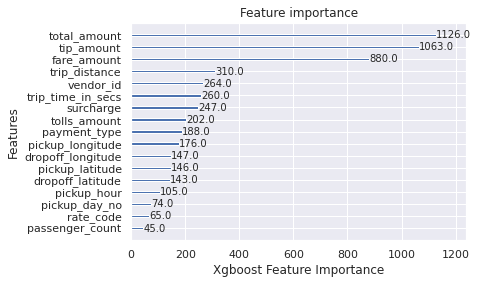

In [225]:
plot_importance(xgb)
plt.xlabel("Xgboost Feature Importance")
pyplot.show()

In [227]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
preds = xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2_score=r2_score(y_test, preds)
print('Training accuracy {:.4f}'.format(xgb.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(xgb.score(X_test,y_test)))
print("RMSE: %f" % (rmse))
print("R^2: %f" % (r2_score))

Training accuracy 0.9922
Testing accuracy 0.9919
RMSE: 0.142809
R^2: 0.991867


In [228]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [229]:
model= lgb.LGBMRegressor()

In [230]:
model.fit(X_train, y_train)

LGBMRegressor()

In [231]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
preds = model.predict(X_test)
rmse= np.sqrt(mean_squared_error(y_test, preds))
r2_score=r2_score(y_test, preds)
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))
print("RMSE: %f" % (rmse))
print("R^2_: %f" % (r2_score))

Training accuracy 1.0000
Testing accuracy 1.0000
RMSE: 0.006854
R^2_: 0.999981


Text(0.5, 0, 'Light GBM')

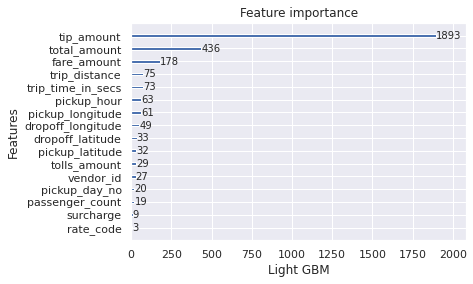

In [232]:
lgb.plot_importance(model)
plt.xlabel("Light GBM")

In [233]:
XX=X
yy=pd.DataFrame() 
XX['tip_amount']=y['tip_amount']
yy['fare_amount']=X['fare_amount']
XX = XX.drop(columns = ['fare_amount'])
XX = XX.drop(columns = ['total_amount'])

In [234]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.25, random_state=12)

In [235]:
xxgb = XGBRegressor()

In [236]:
xxgb.fit(XX_train, yy_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

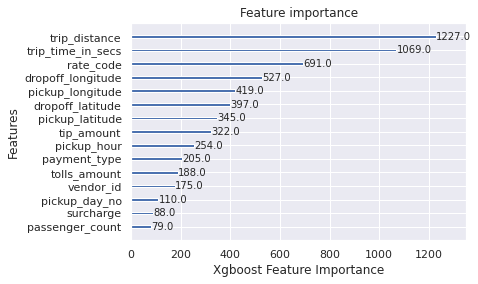

In [237]:
plot_importance(xxgb)
plt.xlabel("Xgboost Feature Importance")
pyplot.show()

In [238]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
preds_ = xxgb.predict(XX_test)
rmse_= np.sqrt(mean_squared_error(yy_test, preds_))
r2_score_=r2_score(yy_test, preds_)
print('Training accuracy {:.4f}'.format(xxgb.score(XX_train,yy_train)))
print('Testing accuracy {:.4f}'.format(xxgb.score(XX_test,yy_test)))
print("RMSE: %f" % (rmse_))
print("R^2_: %f" % (r2_score_))

Training accuracy 0.9844
Testing accuracy 0.9834
RMSE: 0.899504
R^2_: 0.983412


In [239]:
model_= lgb.LGBMRegressor()

In [240]:
model_.fit(XX_train, yy_train)

LGBMRegressor()

In [241]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
preds_ = model_.predict(XX_test)
rmse_= np.sqrt(mean_squared_error(yy_test, preds_))
r2_score_=r2_score(yy_test, preds_)
print('Training accuracy {:.4f}'.format(model_.score(XX_train,yy_train)))
print('Testing accuracy {:.4f}'.format(model_.score(XX_test,yy_test)))
print("RMSE: %f" % (rmse_))
print("R^2_: %f" % (r2_score_))

Training accuracy 0.9868
Testing accuracy 0.9864
RMSE: 0.814935
R^2_: 0.986385


Text(0.5, 0, 'Light GBM')

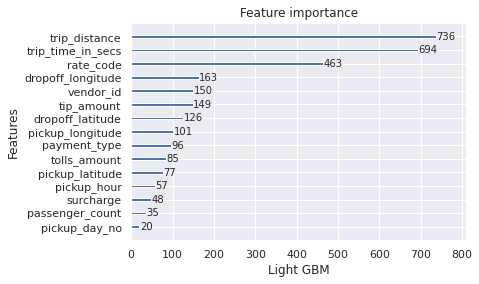

In [242]:
lgb.plot_importance(model_)
plt.xlabel("Light GBM")

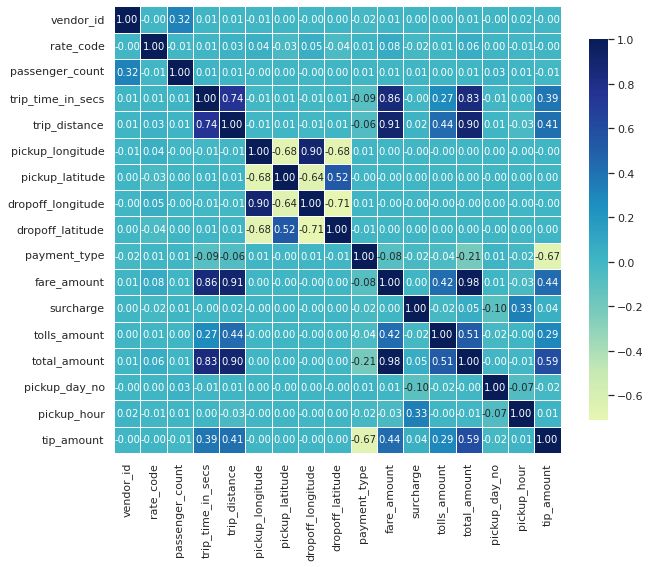

In [226]:
def correlation_heatmap(x):
    correlations = x.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
Z=X
Z['tip_amount']=y['tip_amount']
correlation_heatmap(Z)